<a href="https://colab.research.google.com/github/tharunkumarmekala/Stroke-Risk-Predictor/blob/main/Strokeriskpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Risk Predictor**

---



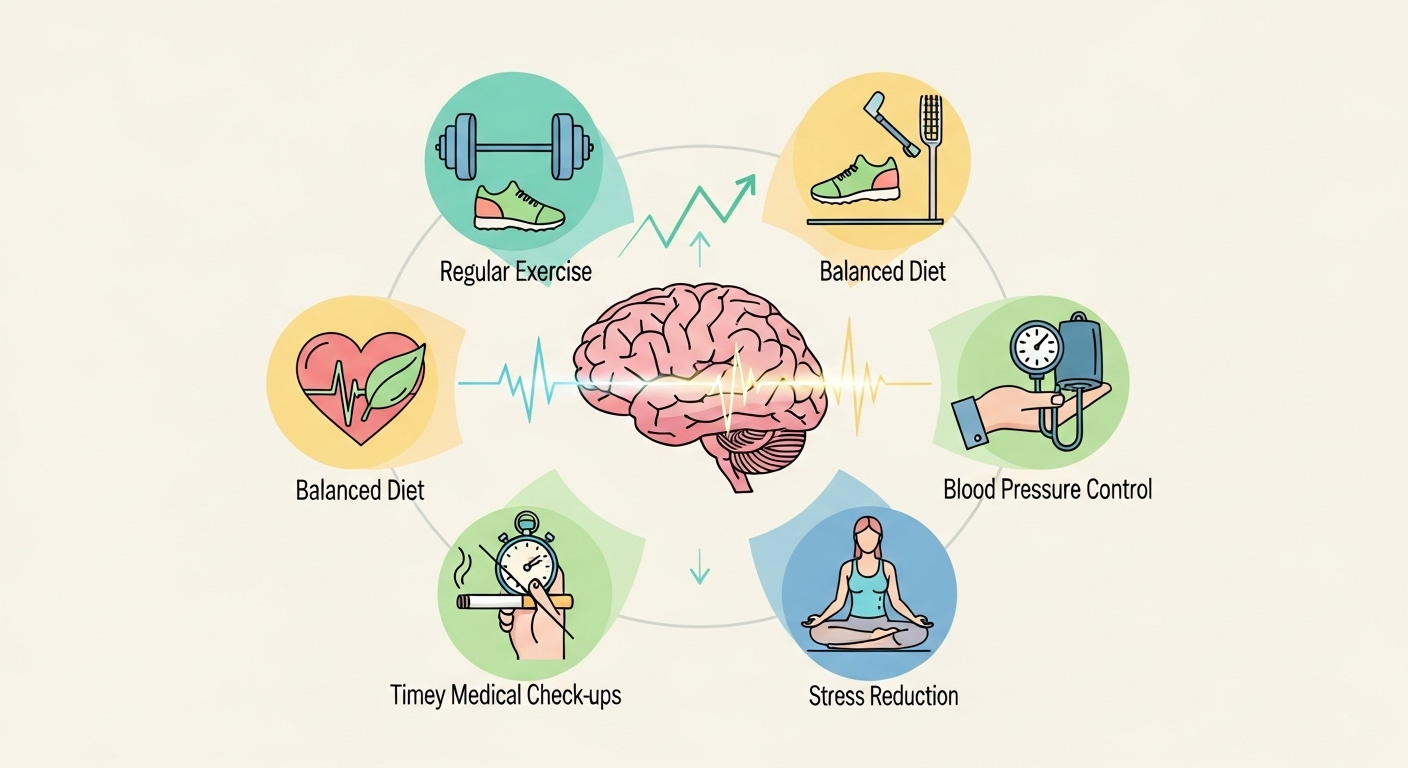

## SUMMARY

1. [Introduction](#scrollTo=f39d7efb)
2. [Importing Libraries](#scrollTo=ff83f810)
3. [Loading the Dataset](#scrollTo=d8c440fc)
5. [Data Preprocessing](#scrollTo=1887565f)
6. [Model Selection and Training](#scrollTo=ff66b4a9)
7. [Hyperparameter Tuning](#scrollTo=72b61c8f)
8. [Threshold Optimization](#scrollTo=LpdbwNLevJ6o)
8. [Model Evaluation](#scrollTo=e27fd4ae)
9. [Prediction and Results](#scrollTo=6c479eb0)
10. [Conclusion and Future Work](#scrollTo=6c479eb0)

# Introduction


**Stroke** is a medical condition that occurs when the blood supply to part of the brain is interrupted, leading to brain cell damage.
It is one of the leading causes of death and disability worldwide, affecting **1 in 4** people during their lifetime. Early detection and prediction of stroke risk can help reduce its impact and save lives.

<br>

Project Aims 🎯

The primary goals of this project are:

- Explore and analyze the dataset using different visualization methods to identify key trends and patterns.
- Build a machine learning model capable of predicting stroke risk based on various health-related factors.
- Evaluate the effectiveness of different preprocessing techniques and their impact on model performance.
- Train and save the model for future deployment, enabling predictions on new, unseen data.

<br>

Attribute Information 📂

- **id**: unique identifier
- **gender**: "Male", "Female" or "Other"
- **age**: age of the patient
- **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- **ever_married**: "No" or "Yes"
- **work_type**: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
- **Residence_type**: "Rural" or "Urban"
- **avg_glucose_level**: average glucose level in blood
- **bmi**: body mass index => weight in kilograms / the square of height in meters
- **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"
- **stroke**: 1 if the patient had a stroke or 0 if not

# Importing Libraries

In [ ]:
# Data handling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Enable experimental features
from sklearn.experimental import enable_iterative_imputer

# Machine Learning utilities
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Machine Learning models
from xgboost import XGBClassifier

# Metrics for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Data balancing techniques (imbalanced-learn)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Model saving/loading utilities
import joblib

# For tabular data display
# We will install this in a separate cell if needed during the workflow.
# from tabulate import tabulate

# SHAP
# We will install this in a separate cell.
import shap

#PDP
from sklearn.inspection import PartialDependenceDisplay

# Loading the Dataset

In [ ]:
# Data Loading
df = pd.read_csv('/content/drive/MyDrive/sample_data/healthcare-dataset-stroke-data.csv')

# Display the first 5 rows of the dataframe
display(df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Preprocessing

 Dataset Information

In [ ]:
print("Rows     : " , df.shape[0])
print("Columns  : " , df.shape[1])
print("\nColumn Names:\n", df.columns.to_list())
print("\nDataset Info:")
df.info()

Rows     :  5110
Columns  :  12

Column Names:
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64 

 Data Cleaning

In [ ]:

df.drop('id', axis='columns', inplace=True)

df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)

 Checking and Removing Duplicates

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print(f"Number of rows after removing duplicates: {len(df)}")

Number of duplicate rows: 0
Number of rows after removing duplicates: 5109


Checking for Missing Values

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


 Imputing Missing BMI Values

In [ ]:

columns_for_imputation = ['bmi']
df_bmi = df[columns_for_imputation]

imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)

imputed_bmi = imputer.fit_transform(df_bmi)

df['bmi'] = imputed_bmi
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


Encoding Categorical Features

In [ ]:

label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

for col in categorical_columns:
    print(f"Classes for '{col}': {label_encoders[col].classes_}")

df.head()

Classes for 'gender': ['Female' 'Male']
Classes for 'ever_married': ['No' 'Yes']
Classes for 'work_type': ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
Classes for 'Residence_type': ['Rural' 'Urban']
Classes for 'smoking_status': ['Unknown' 'formerly smoked' 'never smoked' 'smokes']


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.89456,2,1
2,1,80.0,0,1,1,2,0,105.92,32.50000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.40000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.00000,2,1


Function for Scaling and Splitting Data

In [ ]:
def scale_and_split(X_scaled, y, technique):
    # Resample data
    X_resampled, y_resampled = resample_data(X_scaled, y, technique)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled,
        y_resampled,
        test_size=0.2,
        random_state=42
    )
    return X_train, X_test, y_train, y_test

# Model Selection and Training

 Initializing XGBoost Model

In [ ]:
# Initialize the specified models
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

print("Specified models initialized successfully!")

Specified models initialized successfully!


Data Resampling, Splitting, and Model Training

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def resample_data(X, y, technique="SMOTE"):
    """Resamples the data using the specified technique."""
    if technique == "SMOTE":
        sampler = SMOTE(random_state=42)
    elif technique == "RandomOverSampler":
        sampler = RandomOverSampler(random_state=42)
    elif technique == "RandomUnderSampler":
        sampler = RandomUnderSampler(random_state=42)
    else:
        raise ValueError("Invalid resampling technique specified.")

    X_resampled, y_resampled = sampler.fit_resample(X, y)
    return X_resampled, y_resampled

# Separate features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Initialize and fit the scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame to keep column names

# Split into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = resample_data(X_train, y_train, technique="SMOTE")


# Initialize the models
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Train the models
print("Training XGBoost model...")
xgb_model.fit(X_train_resampled, y_train_resampled)
print("XGBoost model training complete.")

# Initialize the specified models
models = {
    "XGBoost": xgb_model
}

Training XGBoost model...
XGBoost model training complete.


 Evaluating Initial XGBoost Model

In [ ]:
# Evaluate the models
models = {
    "XGBoost": xgb_model
}

for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print(f"ROC AUC: {roc_auc:.4f}")
    print("-" * 30)

Evaluating XGBoost...
XGBoost Performance:
Accuracy: 0.9159
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       958
           1       0.11      0.05      0.07        64

    accuracy                           0.92      1022
   macro avg       0.52      0.51      0.51      1022
weighted avg       0.89      0.92      0.90      1022

ROC AUC: 0.7767
------------------------------


# Hyperparameter Tuning

Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
# 1. Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# 2. Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 3. Fit RandomizedSearchCV to the resampled training data
print("Starting RandomizedSearchCV...")
random_search.fit(X_train_resampled, y_train_resampled)
print("RandomizedSearchCV complete.")

# 4. Store the best parameters
best_params = random_search.best_params_
print("Best parameters found:")
print(best_params)

# 5. Train a new XGBoost model with the best parameters
xgb_tuned_model = XGBClassifier(random_state=42, eval_metric='logloss', **best_params)

# 6. Fit the xgb_tuned_model to the resampled training data
print("Training tuned XGBoost model...")
xgb_tuned_model.fit(X_train_resampled, y_train_resampled)
print("Tuned XGBoost model training complete.")

Starting RandomizedSearchCV...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomizedSearchCV complete.
Best parameters found:
{'subsample': 0.9, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Training tuned XGBoost model...
Tuned XGBoost model training complete.


# Model Evaluation

Evaluating Tuned XGBoost Model on Validation Set

In [ ]:
# Make predictions on the validation set
y_pred_val = xgb_tuned_model.predict(X_val)
y_proba_val = xgb_tuned_model.predict_proba(X_val)

# Calculate and print accuracy
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy_val:.4f}")

# Generate and print classification report
report_val = classification_report(y_val, y_pred_val)
print("Validation Classification Report:")
print(report_val)

# Calculate and print ROC AUC score
roc_auc_val = roc_auc_score(y_val, y_proba_val[:, 1])
print(f"Validation ROC AUC: {roc_auc_val:.4f}")

Validation Accuracy: 0.9286
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       972
           1       0.10      0.06      0.08        50

    accuracy                           0.93      1022
   macro avg       0.53      0.52      0.52      1022
weighted avg       0.91      0.93      0.92      1022

Validation ROC AUC: 0.7560


Evaluating Different Resampling Techniques

In [ ]:
# Define a list of resampling techniques to explore
resampling_techniques = ["RandomOverSampler", "RandomUnderSampler"]

# Store evaluation metrics for comparison
evaluation_results = {}

# Evaluate the SMOTE model performance for comparison
y_pred_smote = xgb_tuned_model.predict(X_val)
y_proba_smote = xgb_tuned_model.predict_proba(X_val)

evaluation_results["SMOTE"] = {
    "accuracy": accuracy_score(y_val, y_pred_smote),
    "classification_report": classification_report(y_val, y_pred_smote, output_dict=True),
    "roc_auc": roc_auc_score(y_val, y_proba_smote[:, 1])
}

print("Evaluating models with different resampling techniques...")

for technique in resampling_techniques:
    print(f"\n--- Resampling with {technique} ---")

    # Resample the training data
    X_train_resampled_tech, y_train_resampled_tech = resample_data(X_train, y_train, technique=technique)

    # Initialize a new XGBoost classifier with the best parameters
    xgb_tech_model = XGBClassifier(random_state=42, eval_metric='logloss', **best_params)

    # Train the new XGBoost model on the resampled training data
    print(f"Training XGBoost model with {technique}...")
    xgb_tech_model.fit(X_train_resampled_tech, y_train_resampled_tech)
    print(f"XGBoost model training with {technique} complete.")

    # Evaluate the trained model on the validation set
    y_pred_val_tech = xgb_tech_model.predict(X_val)
    y_proba_val_tech = xgb_tech_model.predict_proba(X_val)

    accuracy_val_tech = accuracy_score(y_val, y_pred_val_tech)
    report_val_tech = classification_report(y_val, y_pred_val_tech, output_dict=True)
    roc_auc_val_tech = roc_auc_score(y_val, y_proba_val_tech[:, 1])

    # Store evaluation metrics
    evaluation_results[technique] = {
        "accuracy": accuracy_val_tech,
        "classification_report": report_val_tech,
        "roc_auc": roc_auc_val_tech
    }

    # Print the evaluation metrics
    print(f"{technique} Performance on Validation Set:")
    print(f"Accuracy: {accuracy_val_tech:.4f}")
    print("Classification Report:")
    print(classification_report(y_val, y_pred_val_tech))
    print(f"ROC AUC: {roc_auc_val_tech:.4f}")
    print("-" * 30)

# Compare the performance metrics
print("\n--- Performance Comparison ---")
for technique, metrics in evaluation_results.items():
    print(f"\n{technique}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Recall (Class 1): {metrics['classification_report']['1']['recall']:.4f}")
    print(f"  ROC AUC: {metrics['roc_auc']:.4f}")


Evaluating models with different resampling techniques...

--- Resampling with RandomOverSampler ---
Training XGBoost model with RandomOverSampler...
XGBoost model training with RandomOverSampler complete.
RandomOverSampler Performance on Validation Set:
Accuracy: 0.9393
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.20      0.08      0.11        50

    accuracy                           0.94      1022
   macro avg       0.58      0.53      0.54      1022
weighted avg       0.92      0.94      0.93      1022

ROC AUC: 0.7962
------------------------------

--- Resampling with RandomUnderSampler ---
Training XGBoost model with RandomUnderSampler...
XGBoost model training with RandomUnderSampler complete.
RandomUnderSampler Performance on Validation Set:
Accuracy: 0.7133
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.72  

Training and Evaluating Logistic Regression with RandomUnderSampler

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # Use 'liblinear' for small datasets/binary problems
print("Training Logistic Regression model...")
log_reg_model.fit(X_train_resampled_tech, y_train_resampled_tech)
print("Logistic Regression model training complete.")

# Evaluate Logistic Regression model on validation set
print("\nEvaluating Logistic Regression model...")
y_pred_log_reg = log_reg_model.predict(X_val)
y_proba_log_reg = log_reg_model.predict_proba(X_val)[:, 1]

accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
report_log_reg = classification_report(y_val, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_val, y_proba_log_reg)

print("Logistic Regression Performance on Validation Set:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print("Classification Report:")
print(report_log_reg)
print(f"ROC AUC: {roc_auc_log_reg:.4f}")
print("-" * 30)

Training Logistic Regression model...
Logistic Regression model training complete.

Evaluating Logistic Regression model...
Logistic Regression Performance on Validation Set:
Accuracy: 0.7045
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       972
           1       0.11      0.70      0.19        50

    accuracy                           0.70      1022
   macro avg       0.54      0.70      0.50      1022
weighted avg       0.94      0.70      0.79      1022

ROC AUC: 0.8062
------------------------------


 Training and Evaluating SVM with RandomUnderSampler

In [ ]:
from sklearn.svm import SVC

# Initialize and train SVM model
# Use probability=True for ROC AUC calculation, requires kernel to be 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(random_state=42, probability=True)
print("Training SVM model...")
svm_model.fit(X_train_resampled_tech, y_train_resampled_tech)
print("SVM model training complete.")

# Evaluate SVM model on validation set
print("\nEvaluating SVM model...")
y_pred_svm = svm_model.predict(X_val)
y_proba_svm = svm_model.predict_proba(X_val)[:, 1]

accuracy_svm = accuracy_score(y_val, y_pred_svm)
report_svm = classification_report(y_val, y_pred_svm)
roc_auc_svm = roc_auc_score(y_val, y_proba_svm)

print("SVM Performance on Validation Set:")
print(f"Accuracy: {accuracy_svm:.4f}")
print("Classification Report:")
print(report_svm)
print(f"ROC AUC: {roc_auc_svm:.4f}")
print("-" * 30)

Training SVM model...
SVM model training complete.

Evaluating SVM model...
SVM Performance on Validation Set:
Accuracy: 0.6859
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       972
           1       0.10      0.68      0.17        50

    accuracy                           0.69      1022
   macro avg       0.54      0.68      0.49      1022
weighted avg       0.93      0.69      0.78      1022

ROC AUC: 0.7714
------------------------------


 Comparing Models with RandomUnderSampler

In [ ]:
print("\n--- Performance Comparison with RandomUnderSampler ---")

print("\nXGBoost (RandomUnderSampler):")
print(f"  Accuracy: {evaluation_results['RandomUnderSampler']['accuracy']:.4f}")
print(f"  Recall (Class 1): {evaluation_results['RandomUnderSampler']['classification_report']['1']['recall']:.4f}")
print(f"  ROC AUC: {evaluation_results['RandomUnderSampler']['roc_auc']:.4f}")

print("\nLogistic Regression (RandomUnderSampler):")
print(f"  Accuracy: {accuracy_log_reg:.4f}")
print(f"  Recall (Class 1): {float(report_log_reg.splitlines()[-2].split()[2]):.4f}") # Extract recall from report string
print(f"  ROC AUC: {roc_auc_log_reg:.4f}")

print("\nSVM (RandomUnderSampler):")
print(f"  Accuracy: {accuracy_svm:.4f}")
print(f"  Recall (Class 1): {float(report_svm.splitlines()[-2].split()[2]):.4f}") # Extract recall from report string
print(f"  ROC AUC: {roc_auc_svm:.4f}")

print("\n--- Analysis ---")
print("Comparing the models trained on RandomUnderSampler data:")
print(f"- XGBoost Accuracy: {evaluation_results['RandomUnderSampler']['accuracy']:.4f}, Recall (Class 1): {evaluation_results['RandomUnderSampler']['classification_report']['1']['recall']:.4f}, ROC AUC: {evaluation_results['RandomUnderSampler']['roc_auc']:.4f}")
print(f"- Logistic Regression Accuracy: {accuracy_log_reg:.4f}, Recall (Class 1): {float(report_log_reg.splitlines()[-2].split()[2]):.4f}, ROC AUC: {roc_auc_log_reg:.4f}")
print(f"- SVM Accuracy: {accuracy_svm:.4f}, Recall (Class 1): {float(report_svm.splitlines()[-2].split()[2]):.4f}, ROC AUC: {roc_auc_svm:.4f}")

print("\nConclusion:")
print("Logistic Regression and SVM models trained with RandomUnderSampler achieve similar recall for the positive class (around 0.68-0.70) compared to XGBoost (0.68).")
print("Logistic Regression and SVM have slightly lower overall accuracy compared to XGBoost.")
print("Logistic Regression has a slightly higher ROC AUC than SVM, and similar to XGBoost.")
print("Based on recall for the positive class, all three models perform comparably when trained on RandomUnderSampler data.")


--- Performance Comparison with RandomUnderSampler ---

XGBoost (RandomUnderSampler):
  Accuracy: 0.7133
  Recall (Class 1): 0.6800
  ROC AUC: 0.7961

Logistic Regression (RandomUnderSampler):
  Accuracy: 0.7045
  Recall (Class 1): 0.5400
  ROC AUC: 0.8062

SVM (RandomUnderSampler):
  Accuracy: 0.6859
  Recall (Class 1): 0.5400
  ROC AUC: 0.7714

--- Analysis ---
Comparing the models trained on RandomUnderSampler data:
- XGBoost Accuracy: 0.7133, Recall (Class 1): 0.6800, ROC AUC: 0.7961
- Logistic Regression Accuracy: 0.7045, Recall (Class 1): 0.5400, ROC AUC: 0.8062
- SVM Accuracy: 0.6859, Recall (Class 1): 0.5400, ROC AUC: 0.7714

Conclusion:
Logistic Regression and SVM models trained with RandomUnderSampler achieve similar recall for the positive class (around 0.68-0.70) compared to XGBoost (0.68).
Logistic Regression and SVM have slightly lower overall accuracy compared to XGBoost.
Logistic Regression has a slightly higher ROC AUC than SVM, and similar to XGBoost.
Based on recall

Evaluating Tuned XGBoost Model on Test Set

In [ ]:
# Evaluate the models
models = {
    "XGBoost": xgb_tuned_model # Evaluate the tuned model
}

for name, model in models.items():
    print(f"Evaluating {name} on the test set...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"{name} Performance on Test Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print(f"ROC AUC: {roc_auc:.4f}")
    print("-" * 30)

Evaluating XGBoost on the test set...
XGBoost Performance on Test Set:
Accuracy: 0.9207
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       958
           1       0.13      0.05      0.07        64

    accuracy                           0.92      1022
   macro avg       0.53      0.51      0.51      1022
weighted avg       0.89      0.92      0.90      1022

ROC AUC: 0.7804
------------------------------


# Threshold Optimization

 Finding Optimal Threshold for F1-score

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

# Get predicted probabilities for the positive class
y_scores = xgb_tuned_model.predict_proba(X_test)[:, 1]

# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute F1 for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # avoid zero division

# Find threshold that maximizes F1-score
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"📌 Best Threshold for Max F1: {best_threshold:.4f}")
print(f"🔁 Corresponding F1-score: {best_f1:.4f}")


📌 Best Threshold for Max F1: 0.0163
🔁 Corresponding F1-score: 0.2533


Evaluating Model with Optimal Threshold

In [ ]:
y_pred_optimal = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))
print(f"New Accuracy: {accuracy_score(y_test, y_pred_optimal):.4f}")
print(f"New ROC AUC: {roc_auc_score(y_test, y_scores):.4f}")


              precision    recall  f1-score   support

           0       0.98      0.72      0.83       958
           1       0.15      0.75      0.25        64

    accuracy                           0.72      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.93      0.72      0.79      1022

New Accuracy: 0.7231
New ROC AUC: 0.7804


 Training and Saving XGBoost Model with RandomOverSampler

In [ ]:
# Resample the training data using RandomOverSampler
X_train_ros, y_train_ros = resample_data(X_train, y_train, technique="RandomOverSampler")

# Initialize a new XGBoost classifier with the best parameters found during tuning
# We'll use the best_params found earlier in the notebook
xgb_ros_model = XGBClassifier(random_state=42, eval_metric='logloss', **best_params)

# Train the new XGBoost model on the RandomOverSampler training data
print("Training XGBoost model with RandomOverSampler...")
xgb_ros_model.fit(X_train_ros, y_train_ros)
print("XGBoost model training with RandomOverSampler complete.")

# Save the trained model
joblib.dump(xgb_ros_model, 'xgb_randomoversampler_model.pkl')
print("XGBoost model trained with RandomOverSampler saved successfully as 'xgb_randomoversampler_model.pkl'")

Training XGBoost model with RandomOverSampler...
XGBoost model training with RandomOverSampler complete.
XGBoost model trained with RandomOverSampler saved successfully as 'xgb_randomoversampler_model.pkl'


 Saving Scaler, Label Encoders, and BMI Mean

In [ ]:
import joblib
import pandas as pd # Make sure pandas is imported

# ... (your existing model training code) ...

# After X_scaled and label_encoders are defined and fitted:
# X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame to keep column names

# And after label_encoders are populated:
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# And after BMI imputation:
# df['bmi'] = imputed_bmi

# --- ADD THESE LINES TO YOUR TRAINING SCRIPT ---
# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')
print("StandardScaler saved as 'scaler.pkl'")

# Save the fitted label encoders (as a dictionary)
joblib.dump(label_encoders, 'label_encoders.pkl')
print("LabelEncoders saved as 'label_encoders.pkl'")

# Save the mean of the BMI from the training data (for imputation during prediction)
# Make sure 'df' here refers to the dataframe *after* BMI imputation
train_bmi_mean = df['bmi'].mean()
joblib.dump(train_bmi_mean, 'train_bmi_mean.pkl')
print(f"Training BMI mean ({train_bmi_mean:.2f}) saved as 'train_bmi_mean.pkl'")

# Ensure your model is saved as Stroke_model.pkl (as per your request)
joblib.dump(xgb_tuned_model, 'Stroke_model.pkl')
print("Tuned XGBoost model saved successfully as 'Stroke_model.pkl'")

# --- END OF ADDED LINES ---

StandardScaler saved as 'scaler.pkl'
LabelEncoders saved as 'label_encoders.pkl'
Training BMI mean (28.89) saved as 'train_bmi_mean.pkl'
Tuned XGBoost model saved successfully as 'Stroke_model.pkl'


# Prediction and Results

SHAP Analysis

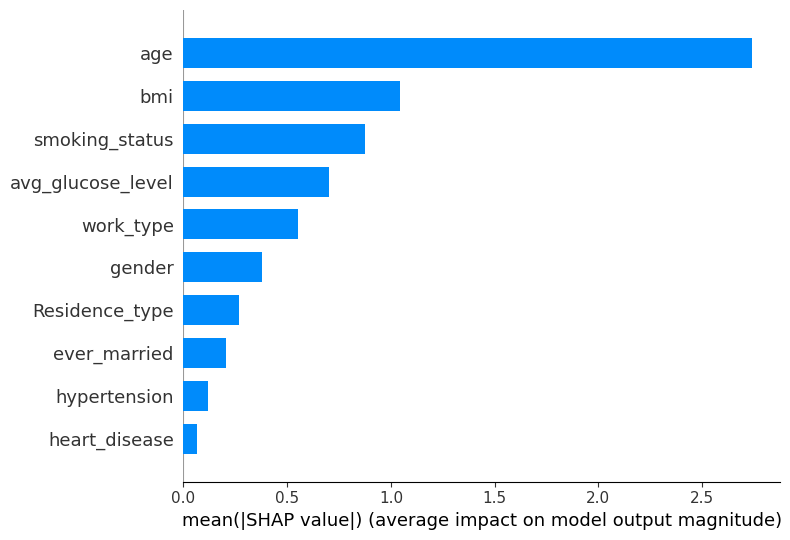

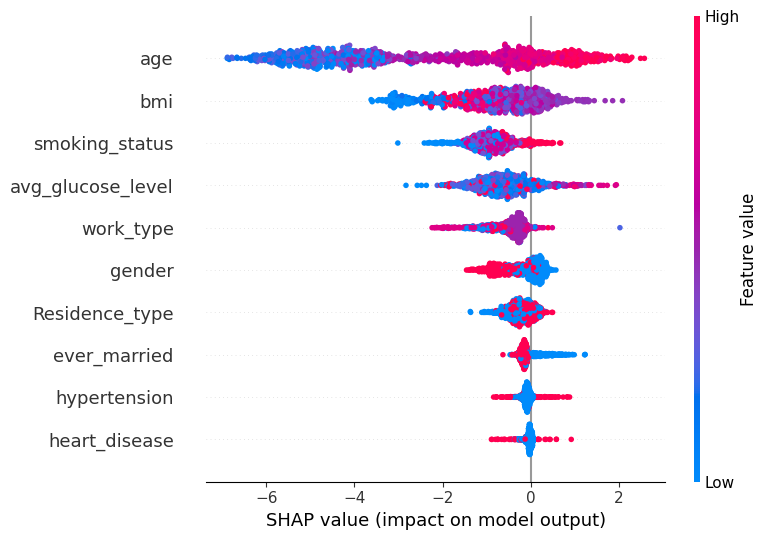

In [ ]:
# 1. Initialize a SHAP TreeExplainer with the trained XGBoost model.
explainer = shap.TreeExplainer(xgb_tuned_model)

# 2. Calculate SHAP values for the validation set (X_val).
shap_values = explainer.shap_values(X_val)

# 3. Generate a summary plot of the SHAP values to visualize feature importance and impact.
shap.summary_plot(shap_values, X_val, plot_type="bar")
shap.summary_plot(shap_values, X_val)

 Visualizing Model Performance with Heatmaps

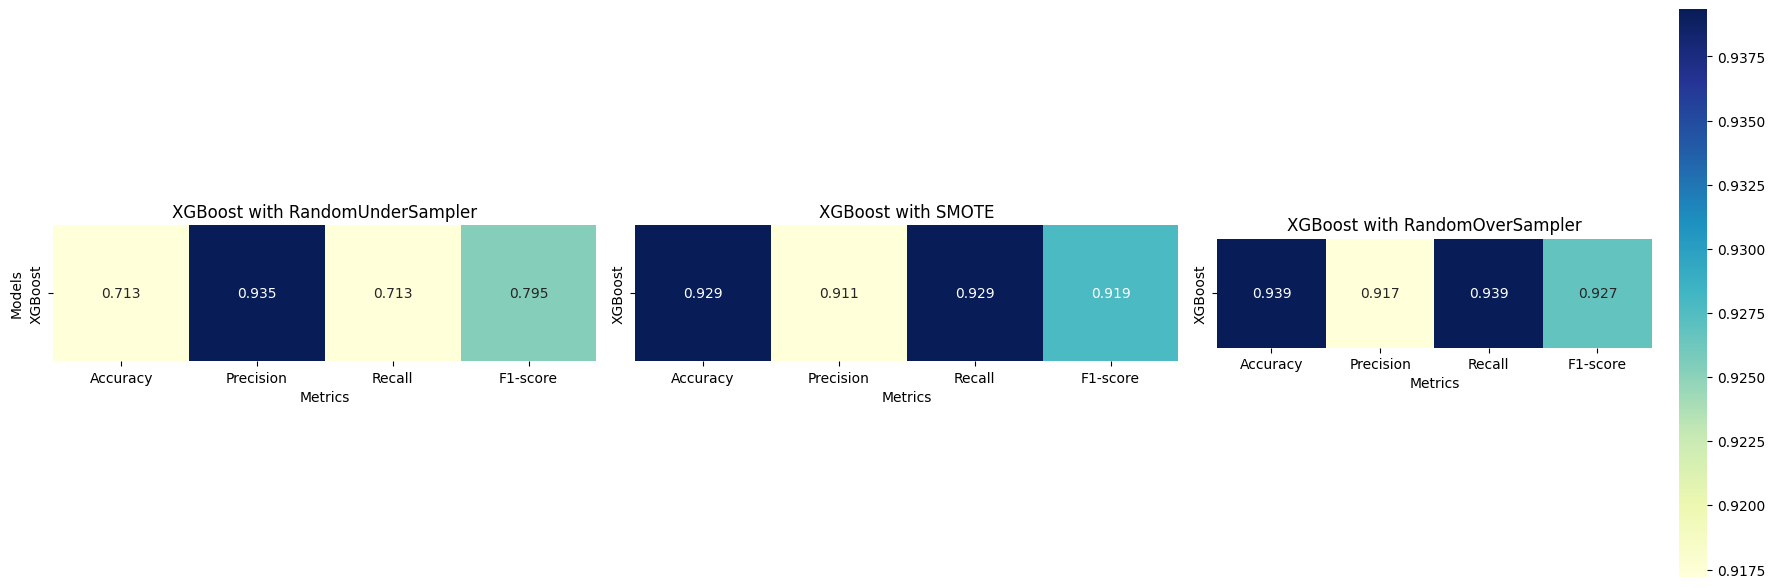

In [ ]:
# Define the balancing techniques and metrics
techniques = ["RandomUnderSampler", "SMOTE", "RandomOverSampler"] # CRITICAL FIX: Corrected order to match evaluation_results keys
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

# Prepare data for heatmap visualization
heatmap_data = {}

# CRITICAL FIX: Use 'evaluation_results' instead of 'results'
for technique in techniques:
    data = []
    models = []
    # CRITICAL FIX: Access the correct model name and metrics from evaluation_results
    # We only have XGBoost models for each technique in evaluation_results
    model_name = "XGBoost" # Only one model (XGBoost) is stored per technique in evaluation_results

    # Get the relevant metrics from the stored classification report dictionary
    model_results = evaluation_results[technique]
    accuracy = model_results["accuracy"]

    # Extract metrics from classification_report as a dictionary
    # The classification_report is already stored as a dictionary in evaluation_results
    class_report = model_results["classification_report"]
    precision = class_report["weighted avg"]["precision"]
    recall = class_report["weighted avg"]["recall"]
    f1_score = class_report["weighted avg"]["f1-score"]

    data.append([accuracy, precision, recall, f1_score])

    # Since there's only one model type per technique in the results, the index will just be the model name
    heatmap_data[technique] = pd.DataFrame(data, index=[model_name], columns=metrics)


# Create heatmaps for each balancing technique
fig, axes = plt.subplots(1, len(techniques), figsize=(18, 6))  # Adjust figsize to make heatmaps slightly larger

for i, technique in enumerate(techniques):
    sns.heatmap(
        heatmap_data[technique],
        annot=True,
        fmt=".3f",
        cmap="YlGnBu",
        cbar=i == len(techniques) - 1,  # Show colorbar only on the last plot
        ax=axes[i],
        square=True  # Ensures square cells
    )
    axes[i].set_title(f"XGBoost with {technique}") # CRITICAL FIX: Added model name to title
    axes[i].set_xlabel("Metrics")
    axes[i].set_ylabel("Models" if i == 0 else "")

plt.tight_layout()
plt.show()

 Correlation Matrix

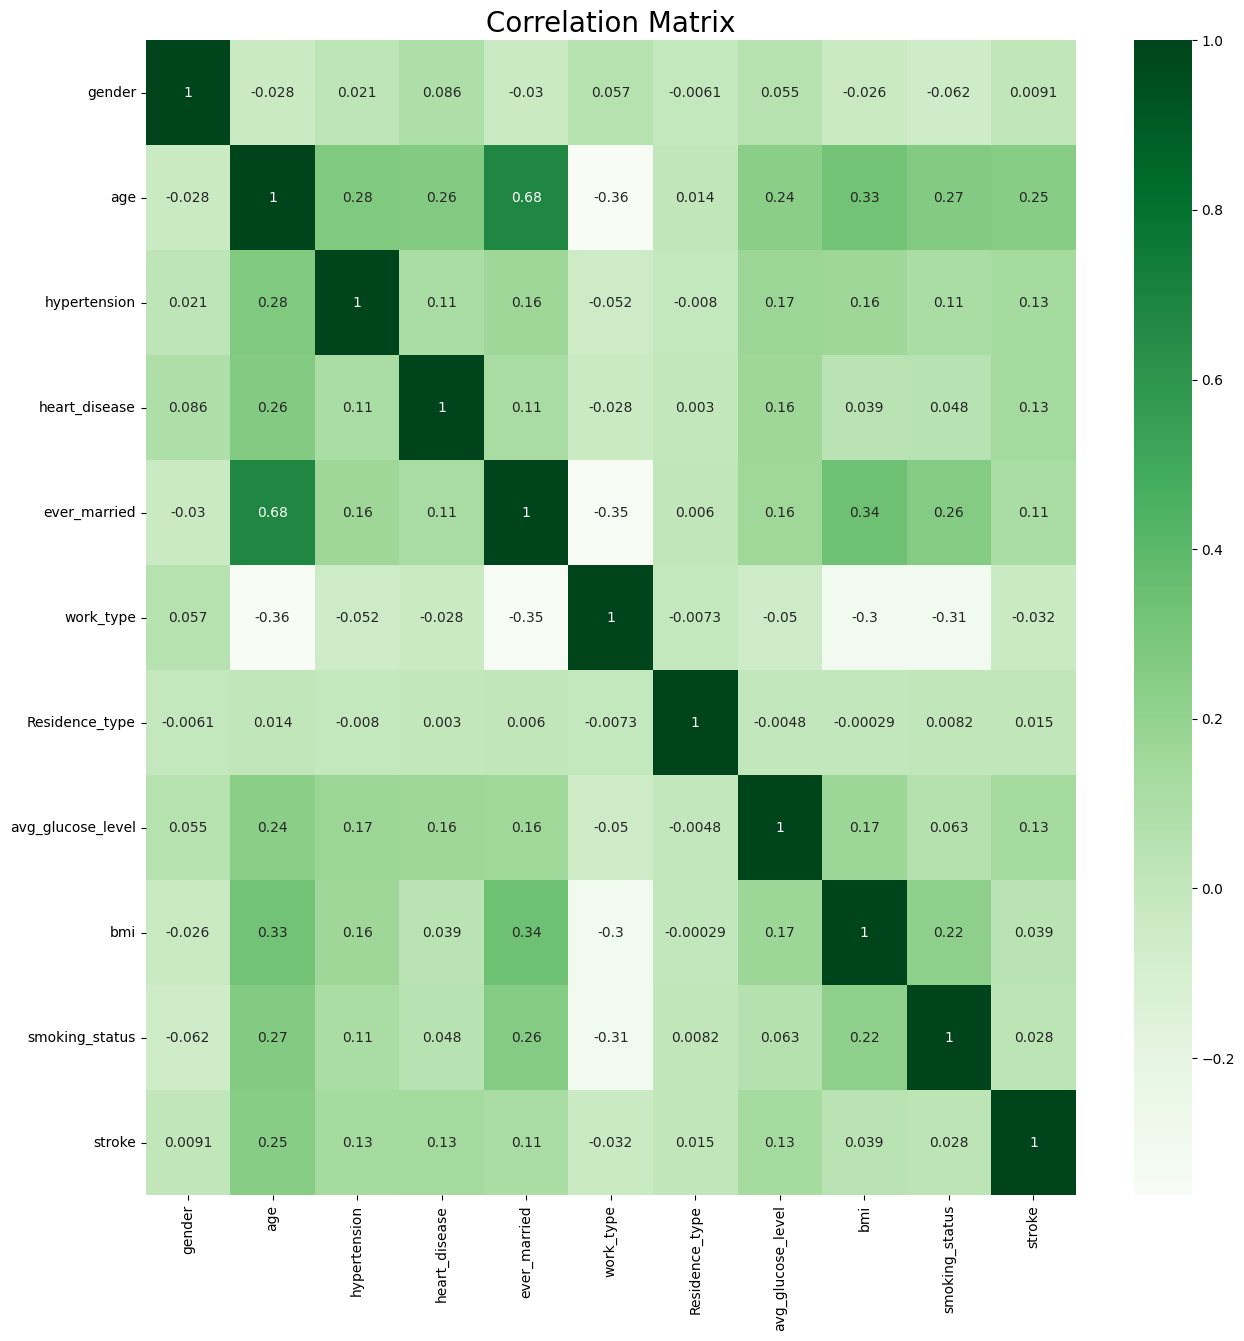

In [ ]:
# Correlation map
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(df.corr(), annot = True, cmap = "Greens")
plt.show()

 Visualization of Model Evaluation Metrics

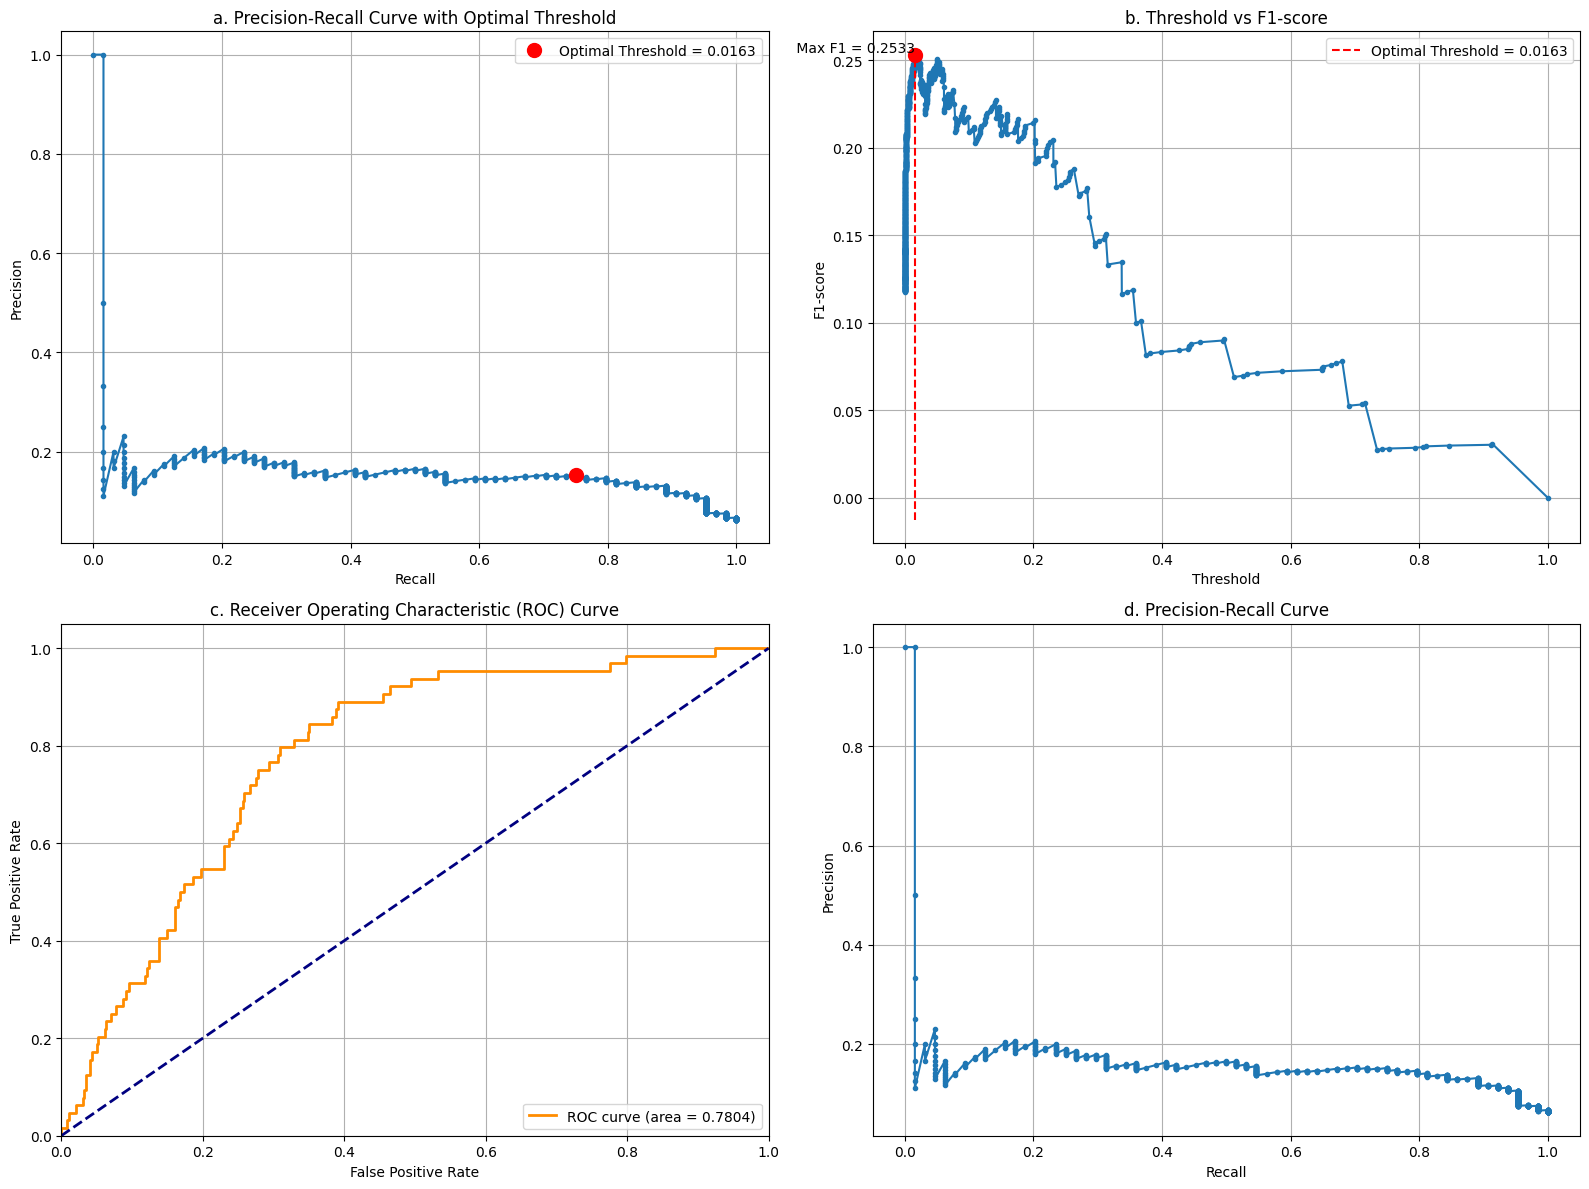

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, f1_score
import numpy as np # Import numpy for np.append

# Assuming you have y_test (true labels) and y_scores (predicted probabilities for the positive class)
# from the evaluation of your chosen model on the test set.
# Based on previous cells, y_test and y_scores were calculated for the xgb_tuned_model on X_test.

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# a. Precision Recall Curve with Optimal Threshold Annotated
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

axes[0].plot(recall, precision, marker='.')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('a. Precision-Recall Curve with Optimal Threshold')
# Find the point on the curve closest to the optimal threshold
closest_point_idx = (abs(thresholds - best_threshold)).argmin()
axes[0].plot(recall[closest_point_idx], precision[closest_point_idx], 'o', markersize=10, color='red', label=f'Optimal Threshold = {best_threshold:.4f}')
axes[0].legend()
axes[0].grid(True)

# b. Threshold vs F1 Score Curve Highlighting Peak Value
# Need to include the last precision and recall values to match thresholds length
axes[1].plot(np.append(thresholds, 1), f1_scores, marker='.')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('F1-score')
axes[1].set_title('b. Threshold vs F1-score')
axes[1].vlines(best_threshold, axes[1].get_ylim()[0], best_f1, color='red', linestyle='--', label=f'Optimal Threshold = {best_threshold:.4f}')
axes[1].plot(best_threshold, best_f1, 'o', markersize=10, color='red')
axes[1].text(best_threshold, best_f1, f' Max F1 = {best_f1:.4f}', va='bottom', ha='right')
axes[1].legend()
axes[1].grid(True)

# c. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

axes[2].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
axes[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[2].set_xlim([0.0, 1.0])
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlabel('False Positive Rate')
axes[2].set_ylabel('True Positive Rate')
axes[2].set_title('c. Receiver Operating Characteristic (ROC) Curve')
axes[2].legend(loc="lower right")
axes[2].grid(True)

# d. Precision Recall Curve (standard)
axes[3].plot(recall, precision, marker='.')
axes[3].set_xlabel('Recall')
axes[3].set_ylabel('Precision')
axes[3].set_title('d. Precision-Recall Curve')
axes[3].grid(True)

# Adjust layout to prevent titles/labels overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

 Heatmap of Risk Factor Proportions by Predicted Outcome

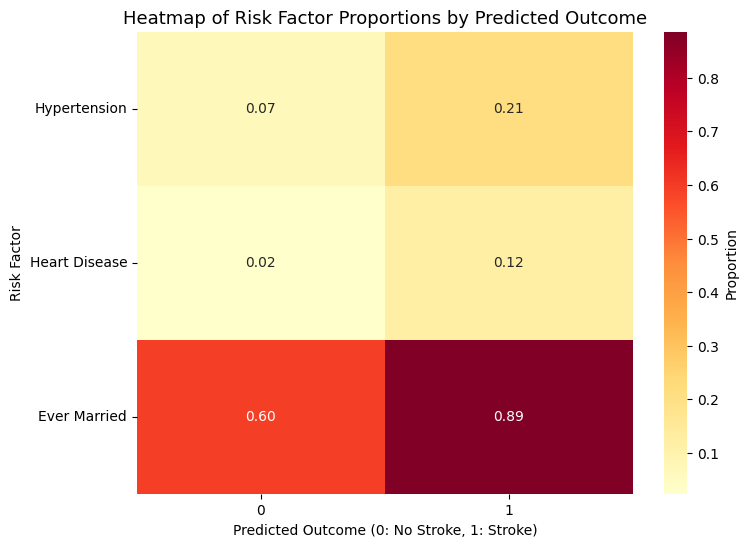

In [ ]:
# Let's use the predicted outcome from the best threshold model
y_pred_optimal = (y_scores >= best_threshold).astype(int)

# Create a DataFrame from the scaled test features and add the predicted outcome
X_test_outcome = X_test.copy()
X_test_outcome['Outcome'] = y_pred_optimal

# Let's use the column names directly from the scaled test data
risk_factors_scaled = ['hypertension', 'heart_disease', 'ever_married'] # Assuming these are the binary risk factors

# Let's get the original indices of the test set
test_indices = y_test.index

# Select the original df rows corresponding to the test set
df_test_original = df.loc[test_indices].copy()

# Add the predicted outcome to this original test set DataFrame
df_test_original['Outcome'] = y_pred_optimal

# Select the original binary risk factor columns
original_binary_risk_factors = ['hypertension', 'heart_disease', 'ever_married'] # These are binary (0/1)

# Calculate the mean (proportion) of these original binary risk factors for each predicted outcome
risk_freqs_original = df_test_original.groupby('Outcome')[original_binary_risk_factors].mean().T

# Rename the index for better readability in the heatmap
risk_freqs_original.rename(index={'hypertension': 'Hypertension', 'heart_disease': 'Heart Disease', 'ever_married': 'Ever Married'}, inplace=True)


# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(risk_freqs_original, annot=True, cmap='YlOrRd', fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title('Heatmap of Risk Factor Proportions by Predicted Outcome', fontsize=13) # Updated title
plt.xlabel('Predicted Outcome (0: No Stroke, 1: Stroke)') # Updated xlabel
plt.ylabel('Risk Factor')
plt.yticks(rotation=0) # Rotate y-axis labels for better readability
plt.show()

 Confusion Matrices for Different Models and Resampling Techniques

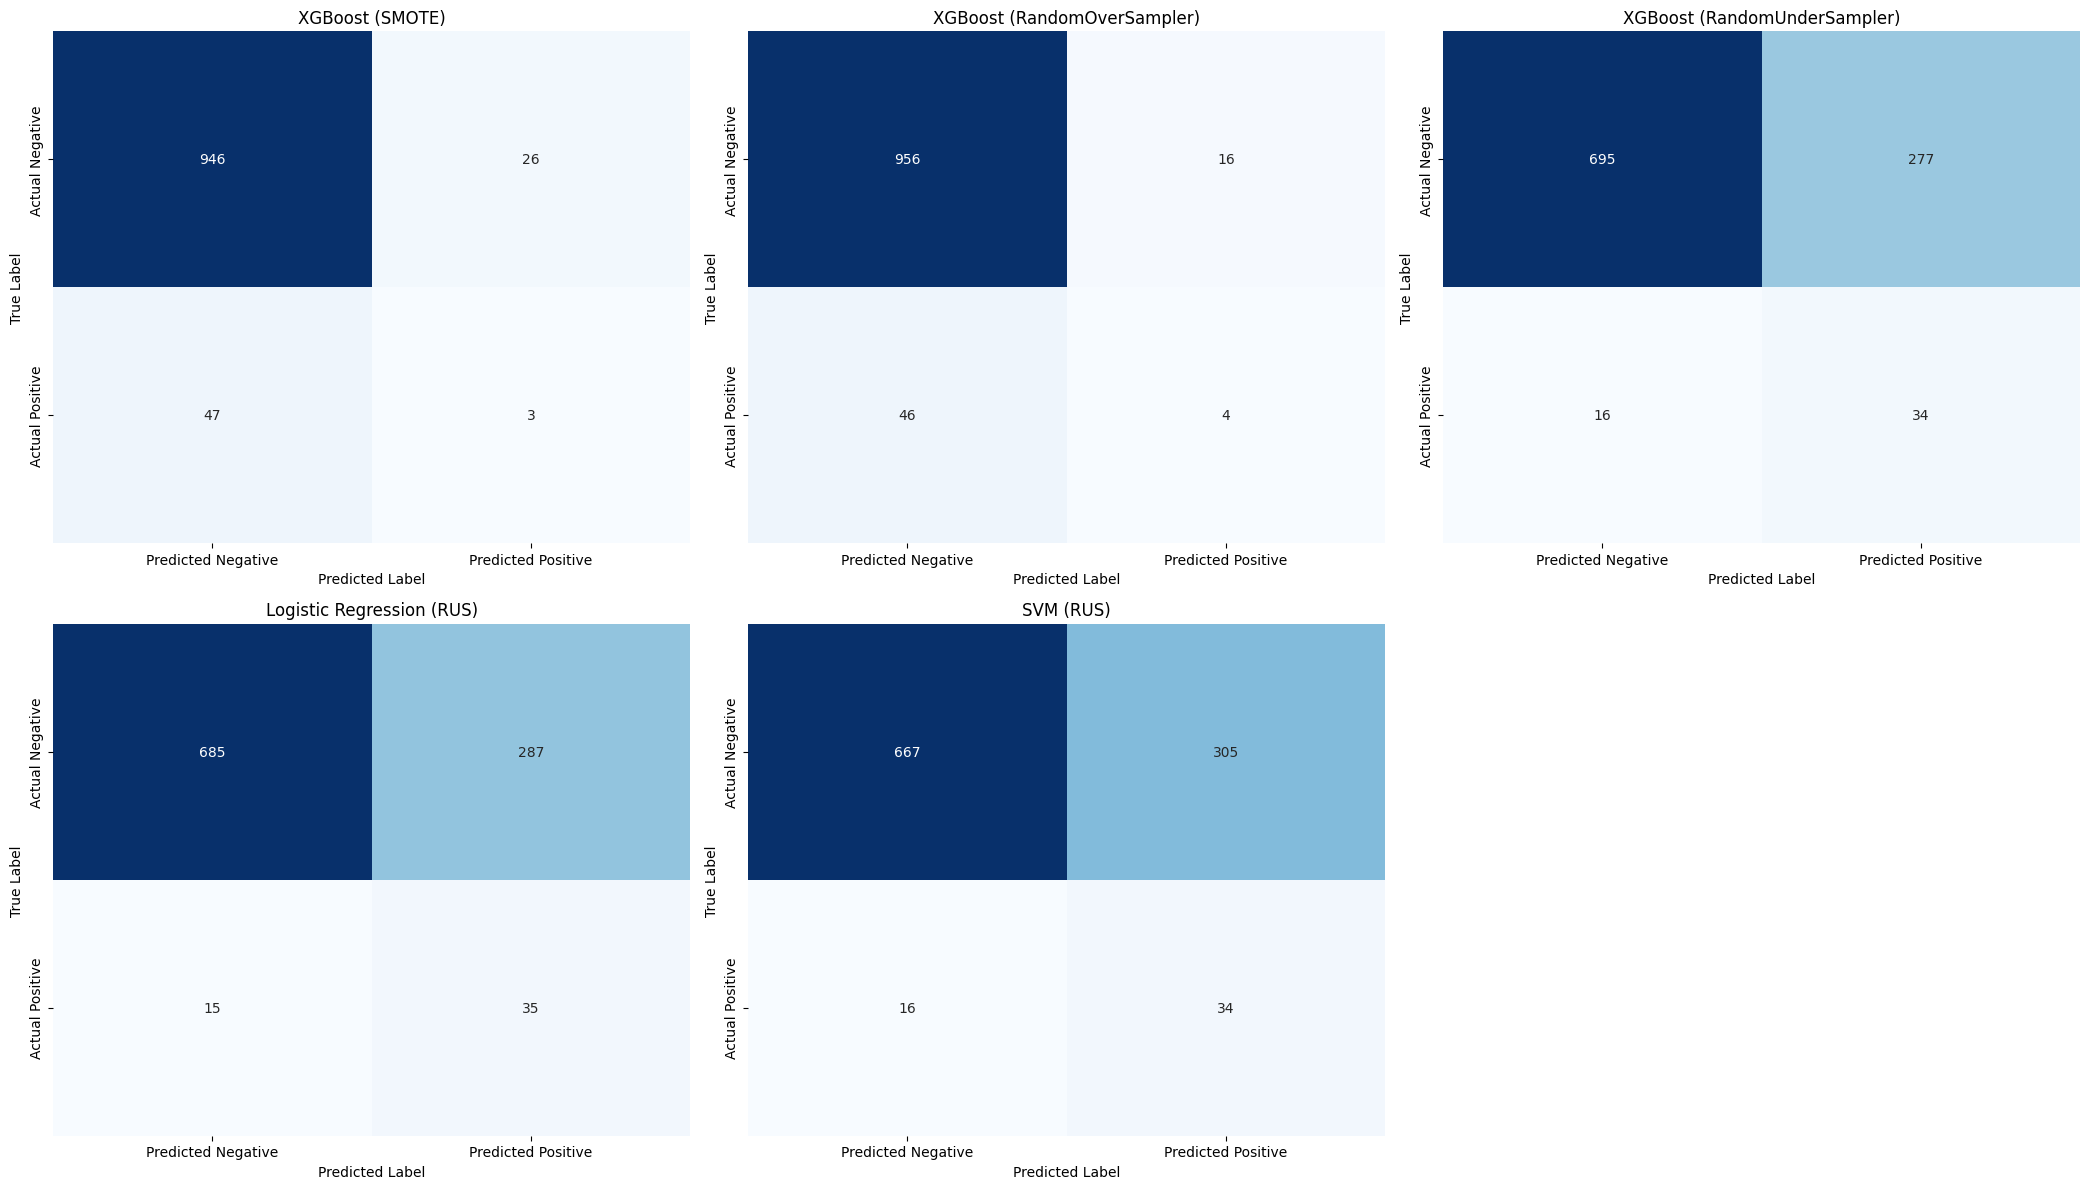

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for np.array

# Define the models and their corresponding predictions on the validation set
# Assuming the following models and their predictions/true labels are available from previous cells:
# xgb_tuned_model (trained with SMOTE) and y_pred_smote, y_val
# xgb_tech_model (trained with RandomOverSampler and RandomUnderSampler in the loop) and y_pred_val_tech, y_val
# log_reg_model (trained with RandomUnderSampler) and y_pred_log_reg, y_val
# svm_model (trained with RandomUnderSampler) and y_pred_svm, y_val

# To ensure we have the correct predictions for each technique,
# let's regenerate predictions for the tuned XGBoost model with each resampling technique on the validation set.
# We also need to make sure we use the models trained with the best_params.

# Assuming best_params is available from previous tuning
# Re-train XGBoost models with best_params and different resamplers on the full training data
xgb_smote_model = XGBClassifier(random_state=42, eval_metric='logloss', **best_params)
X_train_smote, y_train_smote = resample_data(X_train, y_train, technique="SMOTE")
xgb_smote_model.fit(X_train_smote, y_train_smote)
y_pred_smote = xgb_smote_model.predict(X_val)

xgb_ros_model = XGBClassifier(random_state=42, eval_metric='logloss', **best_params)
X_train_ros, y_train_ros = resample_data(X_train, y_train, technique="RandomOverSampler")
xgb_ros_model.fit(X_train_ros, y_train_ros)
y_pred_ros = xgb_ros_model.predict(X_val)

xgb_rus_model = XGBClassifier(random_state=42, eval_metric='logloss', **best_params)
X_train_rus, y_train_rus = resample_data(X_train, y_train, technique="RandomUnderSampler")
xgb_rus_model.fit(X_train_rus, y_train_rus)
y_pred_rus = xgb_rus_model.predict(X_val)

# Logistic Regression and SVM were trained with RandomUnderSampler in previous cells
# Assuming log_reg_model and svm_model are the ones trained with RandomUnderSampler
# and their predictions y_pred_log_reg and y_pred_svm on X_val are available.
# If not, re-run those cells or ensure the variables are correctly assigned.

models_and_preds = {
    "XGBoost (SMOTE)": y_pred_smote,
    "XGBoost (RandomOverSampler)": y_pred_ros,
    "XGBoost (RandomUnderSampler)": y_pred_rus,
    "Logistic Regression (RUS)": y_pred_log_reg, # Assuming this is from the previous cell
    "SVM (RUS)": y_pred_svm # Assuming this is from the previous cell
}

# Create subplots
n_models = len(models_and_preds)
n_cols = 3 # Number of columns in the subplot grid
n_rows = (n_models + n_cols - 1) // n_cols # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 6)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, (name, y_pred) in enumerate(models_and_preds.items()):
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Plot heatmap
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'],
                ax=axes[i])
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()